<a href="https://colab.research.google.com/github/parulsharma098/Cardiovascular-Risk-Prediction/blob/main/CARDIOVASCULAR_RISK_PREDICTION_CAPSTONE_III(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><u>Project Title : Predicting the Risk Of Cardiovascular Diseases</u></b>





***Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.High blood pressure, high blood cholesterol, and smoking are key risk factors for heart disease.There were more than 523.2 million cases of cardiovascular disease in 2019, an increase of 26.6% compared with 2010.***


##**Problem Description**

*The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.The dataset provides the patient's information. It includes
over 4,000 records and 15 attributes.*



## **Objective**

*The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD) considering the other features.*

In [1]:
%%html
<marquee style='width:100%;'><b><u><h1 style="color:#008000;font-family:fallback;">Cardiovascular Risk Prediction</b></u></marquee>

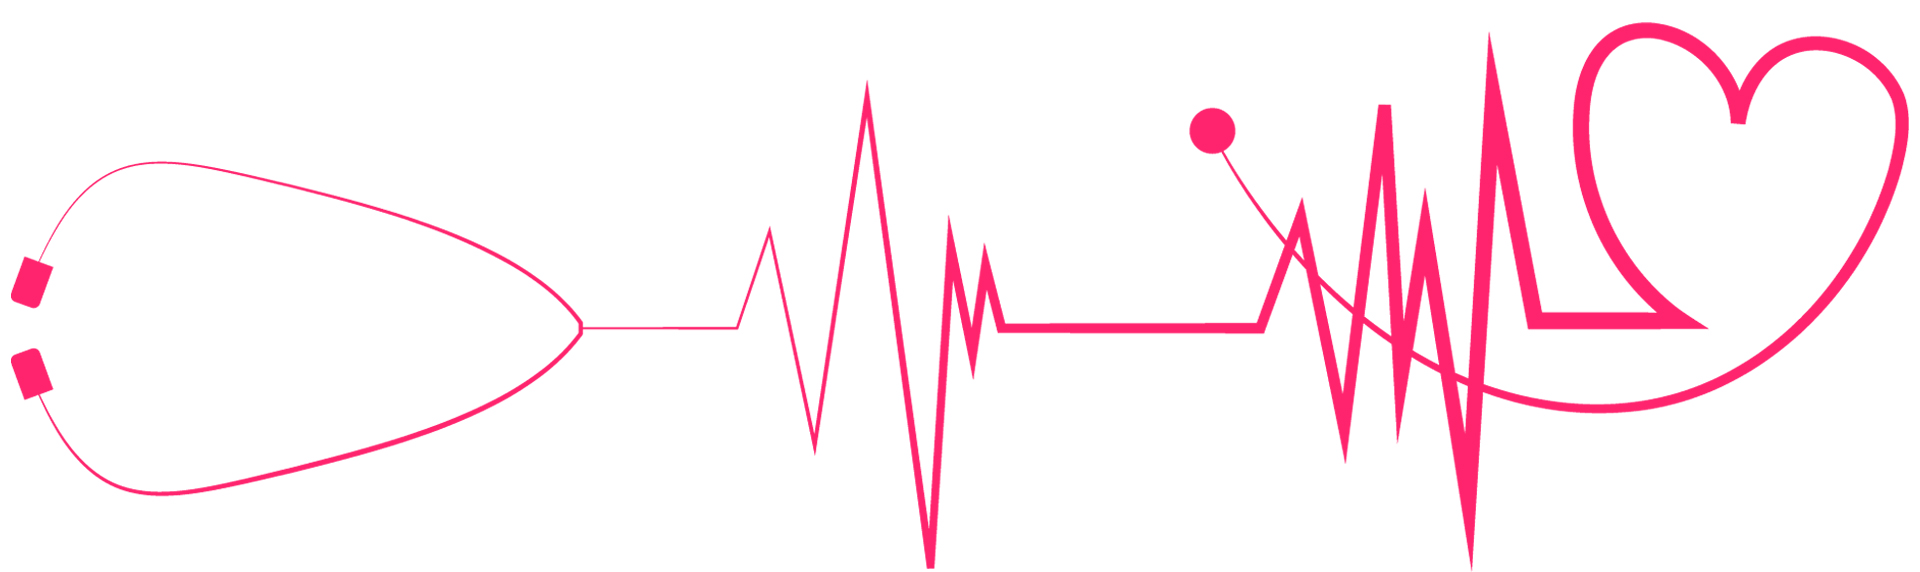

##**Key Facts:**



*   *Cardiovascular diseases (CVDs) are the **leading** cause of **death** globally, taking an estimated **17.9 million** people died from CVDs in **2019**, representing **32%** of all **global deaths**. Of these deaths, **85% were due to heart attack and stroke**.* 
*   *More than **four out of five CVD deaths** are due to **heart attacks** and **strokes**, and **one third of these deaths** occur prematurely in people under **70 years of age**.*
*   *The most important behavioural **risk factors** of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol**.*
*   *Over **three quarters** of CVD deaths take place in **low- and middle-income countries**.*







###*Let's get started with this project by simply importing the libraries and the collected data first.*

## **Importing Libraries**

*To do any type of basic analysis or visualization we will be needing some modules or librabies for outcomes. We will be importing libraries like Pandas,numpy(for data manipulation),matplotlib and seaborn(for data visualization).*

In [2]:
#Importing data manipulation libraries.
import pandas as pd
import numpy as np

#The warnings module handles warnings in Python. 
#It would be helpful in throwing away warnings caused.
import warnings
warnings.filterwarnings('ignore')

#Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Loading the Data**

*In this section, we will be importing our data from the google drive and perform some usual data analysis on it later on.*

In [3]:
#Mounting the Google Drive to access the data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#The variable 'path' contains the path of dataset stored in drive.
#Importing Cardiovascular risk Data File.
path ='/content/drive/MyDrive/CARDIOVASCULAR RISK PREDICTION/'
df = pd.read_csv(path + 'data_cardiovascular_risk.csv',index_col='id')

#Showing the dataframe.
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


## **Variables**

###***Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.***


#**Data Description**

###***Demographic:***

*• **Sex:** male or female("M" or "F")*

*• **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)*

###***Behavioral:***

*• **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")*

*• **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)*

###***Medical( history):***

*• **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)*

*• **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)*

*• **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)*

*• **Diabetes:** whether or not the patient had diabetes (Nominal)*

###***Medical(current):***

*• **Tot Chol:** total cholesterol level (Continuous)*

*• **Sys BP:** systolic blood pressure (Continuous)*

*• **Dia BP:** diastolic blood pressure (Continuous)*

*• **BMI:** Body Mass Index (Continuous)*

*• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)*

*• **Glucose:** glucose level (Continuous)*

###***Predict variable (desired target):***

***• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”
, “0” means “No”) -
DEPENDANT VARIABLE***

## **Data Inspection**

*Here, we will be performing basic and initial analysis on our raw data to check the data inside of each provided column, check the data type of each column and shape of our data.*

In [5]:
#Checking the first 5 rows.
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
#Checking the last 5 rows.
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
#Checking the shape of the data.
df.shape

(3390, 16)

In [8]:
#Checking for the title of all the columns.
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
#Updated Dataset after renaming all the columns.
df.head(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


In [10]:
#Checking for null entries and data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


*It is seen that there are **3390 rows and 16 columns**.There are some **NULL values** present in **"education","cigsPerDay","BPMeds","totChol","BMI","heartRate"and "glucose"**.There are **9 float type** columns,**4 int type** columns and **2 object type** columns. **"10yearCHD" is our Target or Dependant variable**.*

In [11]:
#Statistical description of all the columns present in the dataset.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0
totChol,3352.0,NaN,NaN,NaN,237.074284,45.24743,107.0,206.0,234.0,264.0,696.0


# **Data Cleaning And Feature Engineering**

## **Data Cleansing**

*Data cleansing, also referred to as data cleaning or data scrubbing, is the process of fixing incorrect, incomplete, duplicate or otherwise erroneous data in a data set. It involves identifying data errors and then changing, updating or removing data to correct them. Data cleansing improves data quality and helps provide more accurate, consistent and reliable information for decision-making in an organization.*

**Before proceeding further, let's rename our columns for a better understanding and better efficiency.**

In [12]:
#Renaming the columns for a better view and understanding.
df.rename(columns={'sex':'Gender','is_smoking':'smoking','cigsPerDay':'cigarettes/day','BPMeds':'BP_meds',
                   'prevalentStroke':'stroke','prevalentHyp':'hypertensive',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'10yearCHD'},
          inplace = True)

In [13]:
#Checking the updated names of the columns.
df.columns

Index(['age', 'education', 'Gender', 'smoking', 'cigarettes/day', 'BP_meds',
       'stroke', 'hypertensive', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       '10yearCHD'],
      dtype='object')

In [14]:
df.drop(['education'], axis=1, inplace=True)

*Lets start checking the duplicates and null values  with a suitable treatment afterwards.*

### **Duplicates:**

In [15]:
#Checking for the duplicated entries in the dataset.
MissV = len(df[df.duplicated()])
print("There are",MissV, "duplicate values.")

There are 0 duplicate values.


***As we can see that there are no duplicates present in the dataset but let's check if we have any missing values.***

### **Missing values:**

In [16]:
#Sum of all the null values present in each column.
for i in df.columns.tolist():
  print("Total missing values in",i,":",df[i].isna().sum())

Total missing values in age : 0
Total missing values in Gender : 0
Total missing values in smoking : 0
Total missing values in cigarettes/day : 22
Total missing values in BP_meds : 44
Total missing values in stroke : 0
Total missing values in hypertensive : 0
Total missing values in diabetes : 0
Total missing values in total_cholesterol : 38
Total missing values in systolic_bp : 0
Total missing values in diastolic_bp : 0
Total missing values in bmi : 14
Total missing values in heart_rate : 1
Total missing values in glucose : 304
Total missing values in 10yearCHD : 0


In [17]:
#Sum of the null values overall.
print("Overall missing values are",df.isna().sum().sum())

Overall missing values are 423


*We can be more clear on the exact portion, once we see a percentage distribution of null value counts and how much they'd affect our analysis.*

In [18]:
#Calculating the percentage of NULL values in each column.
totalN = df.isna().sum().sort_values(ascending=False)
percentage = (df.isna().sum()/df.isna().count()).sort_values(ascending=False) * 100
missing_v = pd.concat([totalN, percentage], axis=1, keys=['Total', 'Percentage'])
missing_v

,Total,Percentage
glucose,304,8.967552
BP_meds,44,1.297935
total_cholesterol,38,1.120944
cigarettes/day,22,0.648968
bmi,14,0.412979
heart_rate,1,0.029499
age,0,0.000000
Gender,0,0.000000
smoking,0,0.000000
stroke,0,0.000000


*Let's Visualize the Null values for a clearer Picture.*

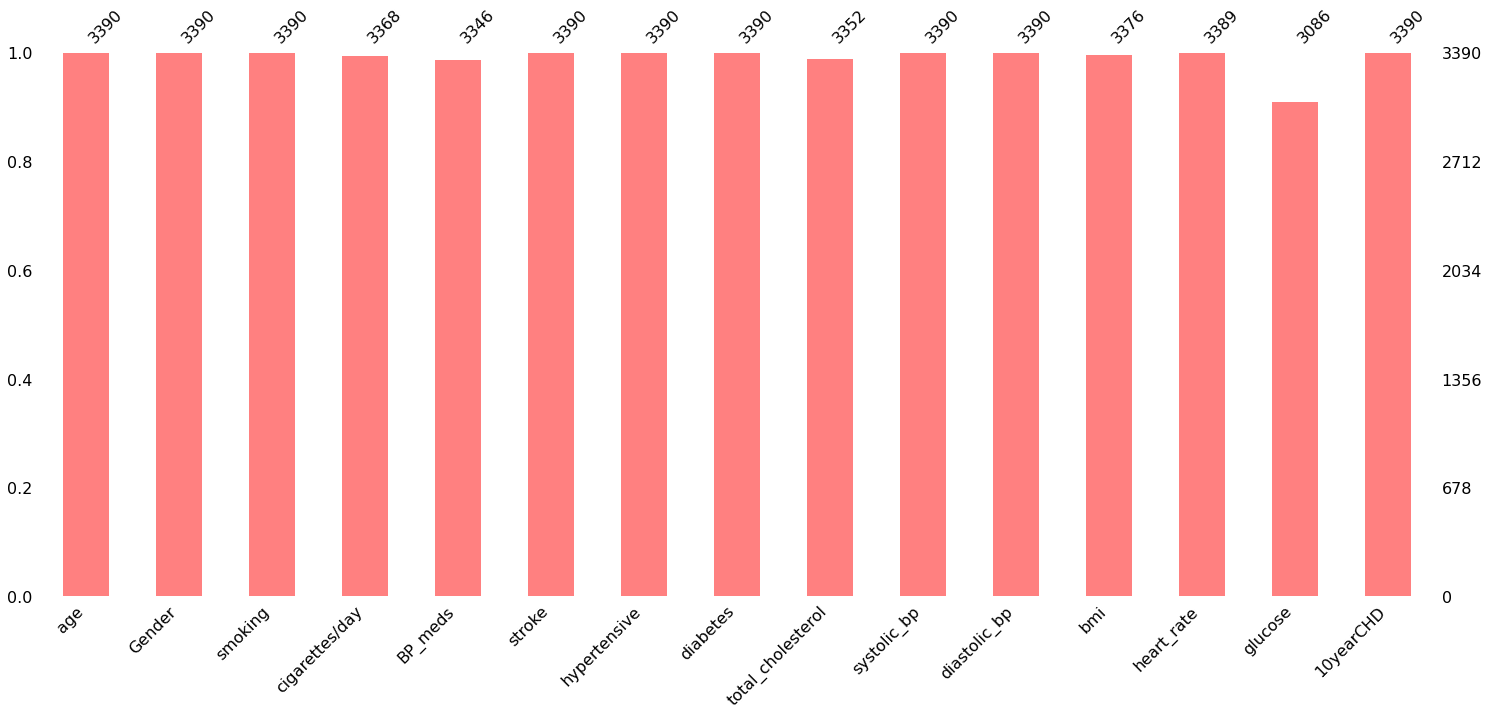

In [19]:
#importing missingno for visualizing the null values.
import missingno as misno

# Visualizing the number of missing values as a bar chart
misno.bar(df,color=(1, 0.5, 0.5))

*This bar chart is clearly showing that **glucose** and **education** have the most significant null values which can majorly affect our model building process and can also affect the predictions later.*

*But the major problem with these null values ​​is that they cannot be deduced from other data inputs. This dataset is from **medical domain**, but the entries in this data are **person-specific** and the values ​​vary from person to person.The chances of two people sharing the same health statistic are very rare. **but 'education' feature can be treated since it can be estimated accordingly, same goes with 'cigarettes/day' since this feature is behavioural and can be treated considering the 'smoking' feature and average consumption**. Apart from these variables we will be removing the remaining null values of remaining features.*

***It could have been imposed by using subtle techniques like KNNImputer, but that might not be as accurate because the other inputs are used to extrapolate null. What is being discussed is nevermore the ideal approach for this type of data.***

# **Feature Engineering**

*Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.*

*Feature engineering consists of various process like*

*   **Feature Creation**
*   **Transformations**
*   **Feature Extraction**
*   **Exploratory Data Analysis**

*Feature Engineering is a very important step in machine learning. Feature engineering refers to the process of designing artificial features into an algorithm.*



## ***Encoding:***
*We are encoding out Categorical feature values into binary values for a better model training and prediction.*
*A Binary Data is a Data which uses two possible states or values i.e. 0 and 1.*


*   *The (0 and 1) also referred to as (true and false), (success and failure), (yes and no) etc.*

*   *Binary Data is a discrete Data and also used in statistics.*




In [20]:
#Encoding the 'Gender' feature into binary column.
df['Gender'] = np.where(df['Gender'] == 'M',1,0)

In [21]:
#Encoding the 'smoking' feature into binary column.
df['smoking'] = np.where(df['smoking'] == 'YES',1,0)

# **Handling Missing Values**

*Handling the missing values is one of the greatest challenges faced by analysts, because making the right decision on how to handle it generates robust data models.*

*Let us look at different ways of imputing the missing values*

1.   **Deleting Rows**
2.   **Replacing With Mean/Median/Mode**
3.   **Assigning An Unique Category**
4.**Nearest Neighbors Imputations (KNNImputer)**

*We will be using the **first(1)** and **second(2)** way.*



## ***cigarettes/day:***

### **Before**

In [22]:
#Checking the null values before the treatment.
cn = pd.DataFrame(df["cigarettes/day"].value_counts())
cn

,cigarettes/day
0.0,1703
20.0,606
30.0,176
15.0,172
10.0,106
9.0,104
5.0,103
3.0,79
40.0,62
1.0,48


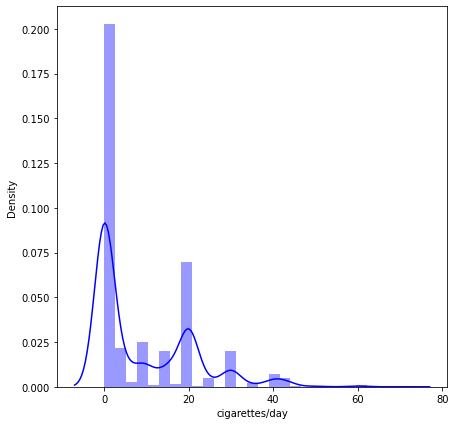

In [23]:
#Distribution plot before imputation.
plt.figure(figsize=(7,7))
sns.distplot(df['cigarettes/day'],color="b")

In [24]:
#Overall count of cigarettes/day.
df['cigarettes/day'].count()

3368

In [25]:
# Mean and median of cigarettes/day.
df['cigarettes/day'].mean().round(0),df['cigarettes/day'].median()

(9.0, 0.0)

In [26]:
# All missing values in the cigarettes/day column.
df[df['cigarettes/day'].isna()]

,age,Gender,smoking,cigarettes/day,BP_meds,stroke,hypertensive,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,10yearCHD
id,,,,,,,,,,,,,,,
422,55,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0


*From the above DataFrame we can say that only data which is missing from cigarettes/day is where people have agreed to smoke atleasst 1 cigarette per day. We will be treating it considering the smoking feature.*

In [27]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
df[df['smoking']==1]['cigarettes/day'].mean(),df[df['smoking']==1]['cigarettes/day'].median()

(18.345945945945946, 20.0)

*Taking the **mean** and **median** of cigarettes/day for the people who have agreed on smoking.*

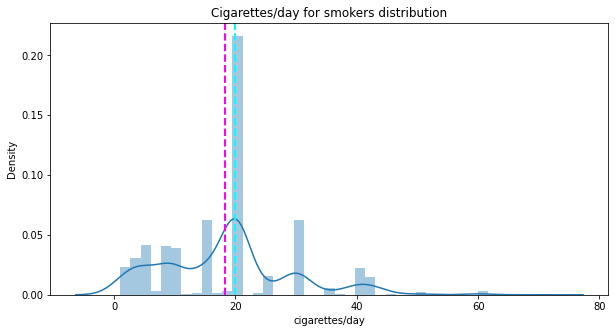

In [28]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.distplot(df[df['smoking']==1]['cigarettes/day'])
plt.axvline(df[df['smoking']==1]['cigarettes/day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[df['smoking']==1]['cigarettes/day'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Cigarettes/day for smokers distribution')
plt.show()

*This graph is depicting that the median lies on 20 aprroximately.*

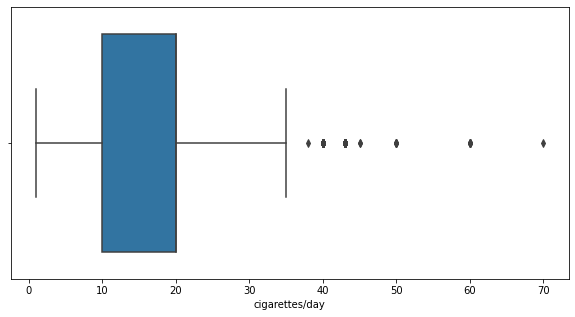

In [29]:
# box plot for the number of cigarettes/day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(df[df['smoking']==1]['cigarettes/day'])

In [30]:
# Imputing the missing values in the cigarettes/day.
df['cigarettes/day'] = df['cigarettes/day'].fillna(df[df['smoking']==1]['cigarettes/day'].median())

*Imputing the null values with the median value of cigarettes/day according to smokers.*

In [31]:
# Checking for any wrong inputs where the patient is not a smoker and cigarettes/day are above 0.

df[(df['smoking']==0) & (df['cigarettes/day']>0)]

,age,Gender,smoking,cigarettes/day,BP_meds,stroke,hypertensive,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,10yearCHD
id,,,,,,,,,,,,,,,


In [32]:
# Checking for any wrong inputs where the patient is a smoker and cigarettes/day is 0.

df[(df['smoking']==1) & (df['cigarettes/day']==0)]

,age,Gender,smoking,cigarettes/day,BP_meds,stroke,hypertensive,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,10yearCHD
id,,,,,,,,,,,,,,,


### **After**

In [33]:
#Checking the null count of 'cigarettes/day' after treatment.
cn_after= pd.DataFrame(df["cigarettes/day"].value_counts())
cn_after

,cigarettes/day
0.0,1703
20.0,628
30.0,176
15.0,172
10.0,106
9.0,104
5.0,103
3.0,79
40.0,62
1.0,48


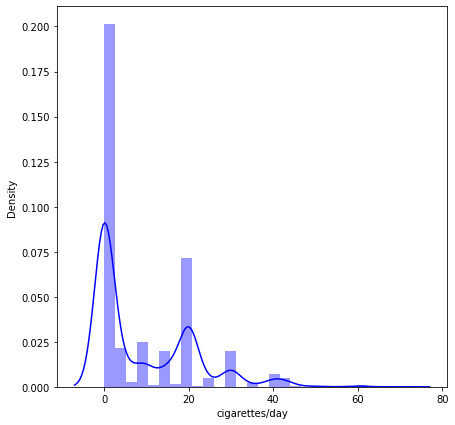

In [34]:
#Distribution plot after imputation.
plt.figure(figsize=(7,7))
sns.distplot(df['cigarettes/day'],color="b")

In [35]:
#Checking the overall count of cigarettes/day after imputation.
df['cigarettes/day'].count()

3390

In [36]:
#Checking the null values after treatment.
df['cigarettes/day'].isna().sum()

0

## ***BP_meds, total_cholesterol, bmi, heart_rate, glucose:***

### **Before**

In [37]:
#Checking the null values before treatment.
bpv= pd.DataFrame(df["BP_meds"].value_counts())
print(bpv)
print('--'*15)
print('--'*15)
tchol= pd.DataFrame(df["total_cholesterol"].value_counts())
print(tchol)
print('--'*15)
print('--'*15)
bmi_v= pd.DataFrame(df["bmi"].value_counts())
print(bmi_v)
print('--'*15)
print('--'*15)
hr= pd.DataFrame(df["heart_rate"].value_counts())
print(hr)
print('--'*15)
print('--'*15)
glu = bpv= pd.DataFrame(df["glucose"].value_counts())
print(glu)
print('--'*15)

     BP_meds
0.0     3246
1.0      100
------------------------------
------------------------------
       total_cholesterol
240.0                 65
210.0                 51
220.0                 48
260.0                 46
232.0                 45
...                  ...
137.0                  1
113.0                  1
392.0                  1
353.0                  1
364.0                  1

[240 rows x 1 columns]
------------------------------
------------------------------
       bmi
22.91   17
22.54   16
22.19   15
23.48   12
25.09   12
...    ...
19.54    1
19.87    1
35.01    1
21.29    1
31.09    1

[1259 rows x 1 columns]
------------------------------
------------------------------
       heart_rate
75.0          442
80.0          298
70.0          241
85.0          191
72.0          184
...           ...
47.0            1
143.0           1
51.0            1
140.0           1
97.0            1

[68 rows x 1 columns]
------------------------------
------------------------

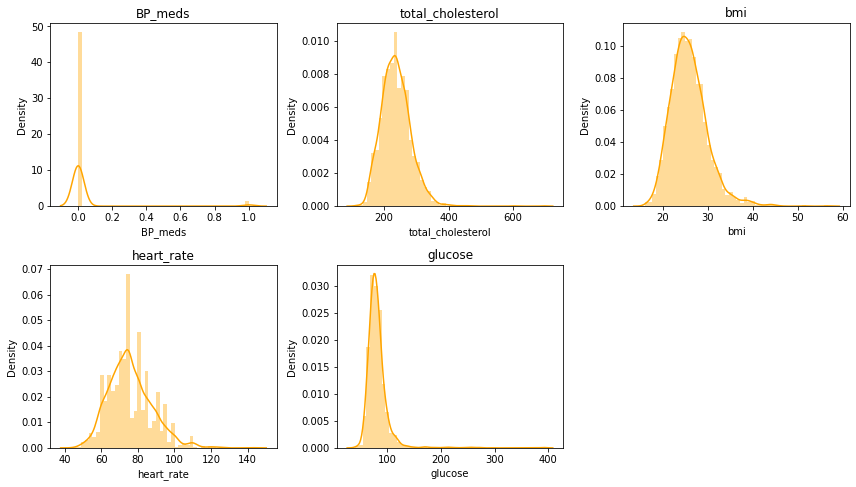

In [79]:
#Distribution plot before imputation.
cols = ['BP_meds','total_cholesterol','bmi','heart_rate','glucose']
# plotting
n=1
plt.figure(figsize=(12,40))
for i in cols:
  plt.subplot(12,3,n)
  n= n+1
  sns.distplot(df[i],color='orange')
  plt.title(i)
  plt.tight_layout() 

In [54]:
#Dropping the remaining null values from the data.
df.dropna(subset=['BP_meds','total_cholesterol','bmi','heart_rate','glucose'],inplace= True)

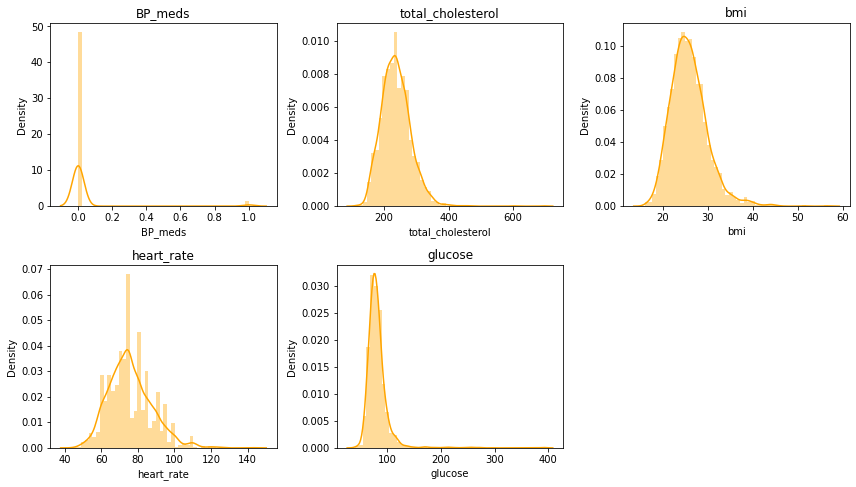

In [77]:
#Distribution plot before imputation.
cols = ['BP_meds','total_cholesterol','bmi','heart_rate','glucose']
# plotting
n=1
plt.figure(figsize=(12,40))
for i in cols:
  plt.subplot(12,3,n)
  n= n+1
  sns.distplot(df[i],color='orange')
  plt.title(i)
  plt.tight_layout() 

In [55]:
#Checking the count of null values in each column after treatment.
df.isna().sum()

age                  0
Gender               0
smoking              0
cigarettes/day       0
BP_meds              0
stroke               0
hypertensive         0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
10yearCHD            0
dtype: int64

#**Exploratary Data Analysis**

*Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.*

*It’s a scientific approach to get the story of the data.It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed.*

## ***10yearCHD(Dependant Variable)***

In [56]:
# Checking the total people who have a risk of CHD(Coronary Heart Disease).
df["10yearCHD"].value_counts()

0    2565
1     458
Name: 10yearCHD, dtype: int64

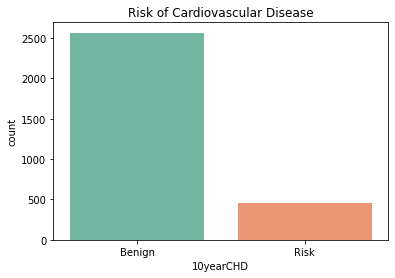

In [65]:
# plotting number of patients at risk of CHD vs those whose results are normal.
g = sns.countplot(df['10yearCHD'],palette = "Set2")
g.set_xticklabels(['Benign','Risk'])
g.set_title('Risk of Cardiovascular Disease')
plt.show()

## **age**

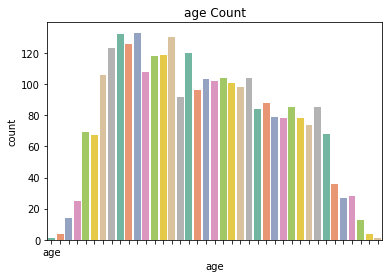

In [93]:
# Plotting the bar graph with number of males and females.
g = sns.countplot(df['age'],palette = "Set2")
g.set_xticklabels(['age'])
g.set_title('age Count')

# Show the graph.
plt.show()

## **Gender**

In [66]:
# Counting the number of males and females.
df["Gender"].value_counts()

0    1666
1    1357
Name: Gender, dtype: int64

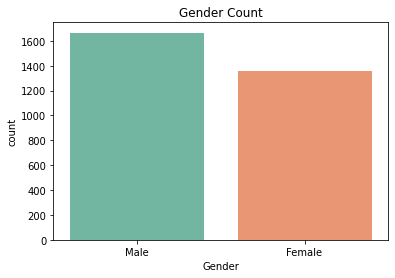

In [67]:
# Plotting the bar graph with number of males and females.
g = sns.countplot(df['Gender'],palette = "Set2")
g.set_xticklabels(['Male','Female'])
g.set_title('Gender Count')

# Show the graph.
plt.show()

## **smoking**

In [68]:
# Counting the number of smokers and non-smokers.(Yes = 1,No = 0)
df["smoking"].value_counts()

0    1524
1    1499
Name: smoking, dtype: int64

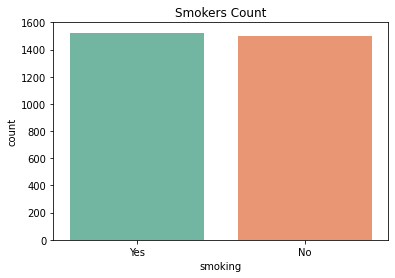

In [70]:
# Plotting number of people smoking vs not smoking.
g = sns.countplot(df['smoking'],palette = "Set2")
g.set_xticklabels(['Yes','No'])
g.set_title('Smokers Count')

# Show the Graph.
plt.show()

### **male smokers**

In [71]:
# Number of males who smokes cigarette.
male_smokers = df.loc[(df['smoking']==1) & (df['Gender']==1)]

In [72]:
male_smokers.shape[0]

838

### **female smokers**

In [73]:
# Number of females who smokes cigarette.
female_smokers = df.loc[(df['smoking']==1) & (df['Gender']==0)]

In [74]:
female_smokers.shape[0]

661

## **stroke**

In [94]:
df["stroke"].value_counts()

0    3005
1      18
Name: stroke, dtype: int64

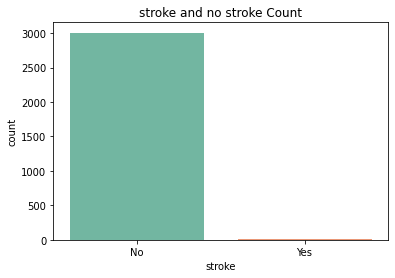

In [95]:
g = sns.countplot(df['stroke'],palette = "Set2")
g.set_xticklabels(['No','Yes'])
g.set_title('stroke and no stroke Count')

# Show the Graph.
plt.show()

## **hypertensive**

In [96]:
df["hypertensive"].value_counts()

0    2073
1     950
Name: hypertensive, dtype: int64

Text(0.5, 1.0, 'hypertensive and not hypertensive Count')

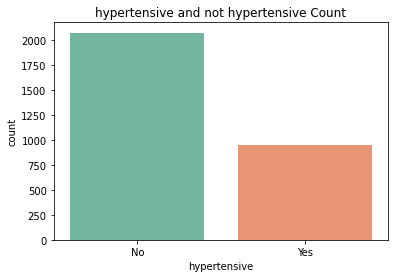

In [97]:
g = sns.countplot(df['hypertensive'],palette = "Set2")
g.set_xticklabels(['No','Yes'])
g.set_title('hypertensive and not hypertensive Count')

## **diabetes**

In [75]:
df["diabetes"].value_counts()

0    2941
1      82
Name: diabetes, dtype: int64

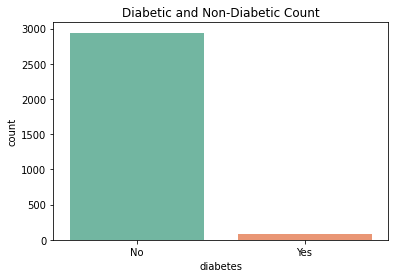

In [76]:
g = sns.countplot(df['diabetes'],palette = "Set2")
g.set_xticklabels(['No','Yes'])
g.set_title('Diabetic and Non-Diabetic Count')

# Show the Graph.
plt.show()

In [80]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(i,":",df[i].nunique())

age : 39
Gender : 2
smoking : 2
cigarettes/day : 31
BP_meds : 2
stroke : 2
hypertensive : 2
diabetes : 2
total_cholesterol : 235
systolic_bp : 223
diastolic_bp : 138
bmi : 1205
heart_rate : 67
glucose : 130
10yearCHD : 2


*Since, It's very clear by  finding out all the unique values in the dataset that there are multiple continuous and categorical features present. we will be seperating categorical, numerical and target variable in individual variables for better exploration and analysis.*

In [84]:
# Extracting categorical features.

cat_features = ['Gender','smoking','BP_meds','stroke','hypertensive','diabetes']
print(f'There are {len(cat_features)} Categorical Features.')

There are 6 Categorical Features.


In [85]:
#All the Categorical features.
cat_features

['Gender', 'smoking', 'BP_meds', 'stroke', 'hypertensive', 'diabetes']

In [86]:
#head of the Categorical columns.
df[cat_features].head()

,Gender,smoking,BP_meds,stroke,hypertensive,diabetes
id,,,,,,
1,1,0,0.0,0,1,0
2,0,1,0.0,0,0,0
3,1,1,0.0,0,1,0
4,0,1,0.0,0,0,0
5,0,0,0.0,0,1,0


In [87]:
# Extracting numerical features.

num_features = ['age','cigarettes/day','total_cholesterol','systolic_bp','diastolic_bp','bmi','heart_rate','glucose']
print(f'There are {len(num_features)} Numerical Features.')

There are 8 Numerical Features.


In [88]:
#All the numerical features.
num_features

['age',
 'cigarettes/day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [89]:
#first five rows of numerical columns.
df[num_features].head()

,age,cigarettes/day,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose
id,,,,,,,,
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0
5,61,0.0,272.0,182.0,121.0,32.80,85.0,65.0


In [90]:
#Storing the dependant variable in a seperate variable for later on.
dep_feature = df['10yearCHD']
dep_feature

id
1       0
2       0
3       1
4       0
5       1
       ..
3384    0
3385    0
3386    0
3387    1
3389    0
Name: 10yearCHD, Length: 3023, dtype: int64

#**Univariate Analysis**

*Univariate analysis explores variables (attributes) one by one. Variables could be either categorical or numerical.“Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.There are different statistical and visualization techniques of investigation for each type of variable.Here we will be using distplots and boxplots.*

## **Univariate analysis for Numerical Features**

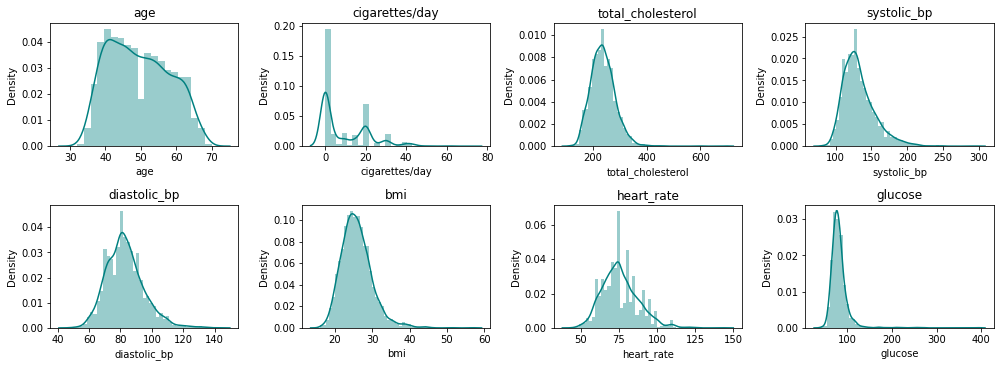

In [98]:
# Making distribution plot for Numerical features for checking the skewness.

n=1
plt.figure(figsize=(14,30))
for i in num_features:
  plt.subplot(12,4,n)
  n= n+1
  sns.distplot(df[i],color='teal')
  plt.title(i)
  plt.tight_layout()

## **Outlier Detection**

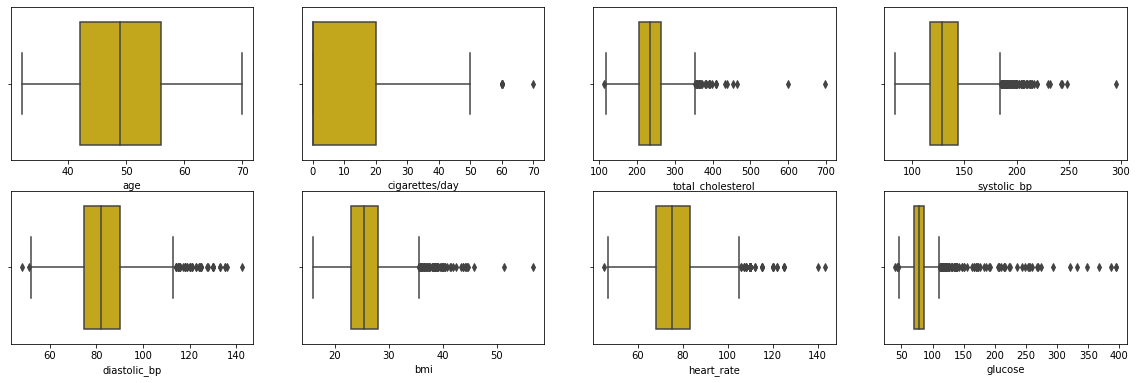

In [99]:
# plotting boxplot for each numerical feature to check for the outliers.

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1
for numerical_feature in num_features:
    ax = plt.subplot(12,4,plotnumber)
    sns.boxplot(df[numerical_feature], color='#DEB800')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

*Both **Gender** and **smoking** have "Object" type inputs in the columns, we will be converting them into binary form like other categorical features.*

In [100]:
# Dropping rows with Cigarette per day greater than 50.
df = df[df["cigarettes/day"] <= 50]

In [101]:
# Dropping rows with DiaBp greater than 140.
df = df[df['diastolic_bp'] <= 140]

In [102]:
# Dropping rows with SysBP greater than 250.
df = df[df['systolic_bp'] <= 250]

In [103]:
# Dropping rows with BMI greater than 50.
df = df[df['bmi'] <= 50]

In [104]:
# Dropping rows with heart rate greater than 130.
df = df[df["heart_rate"] <= 130]

In [105]:
# Dropping rows with glucose greater than 300.
df = df[df["glucose"] <= 300]

In [106]:
# Dropping rows with total cholesterol greater than 500.
df = df[df["total_cholesterol"] <= 500]

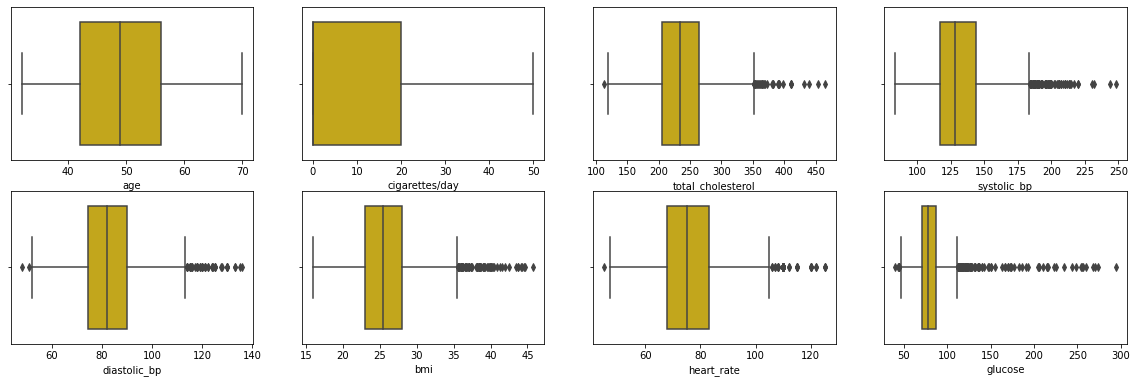

In [107]:
# plotting boxplot for each numerical feature to check for the outliers.

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1
for numerical_feature in num_features:
    ax = plt.subplot(12,4,plotnumber)
    sns.boxplot(df[numerical_feature], color='#DEB800')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3023 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3023 non-null   int64  
 1   education          3023 non-null   float64
 2   Gender             3023 non-null   int64  
 3   smoking            3023 non-null   int64  
 4   cigarettes/day     3023 non-null   float64
 5   BP_meds            3023 non-null   float64
 6   stroke             3023 non-null   int64  
 7   hypertensive       3023 non-null   int64  
 8   diabetes           3023 non-null   int64  
 9   total_cholesterol  3023 non-null   float64
 10  systolic_bp        3023 non-null   float64
 11  diastolic_bp       3023 non-null   float64
 12  bmi                3023 non-null   float64
 13  heart_rate         3023 non-null   float64
 14  glucose            3023 non-null   float64
 15  10yearCHD          3023 non-null   int64  
dtypes: float64(9), int64(7)


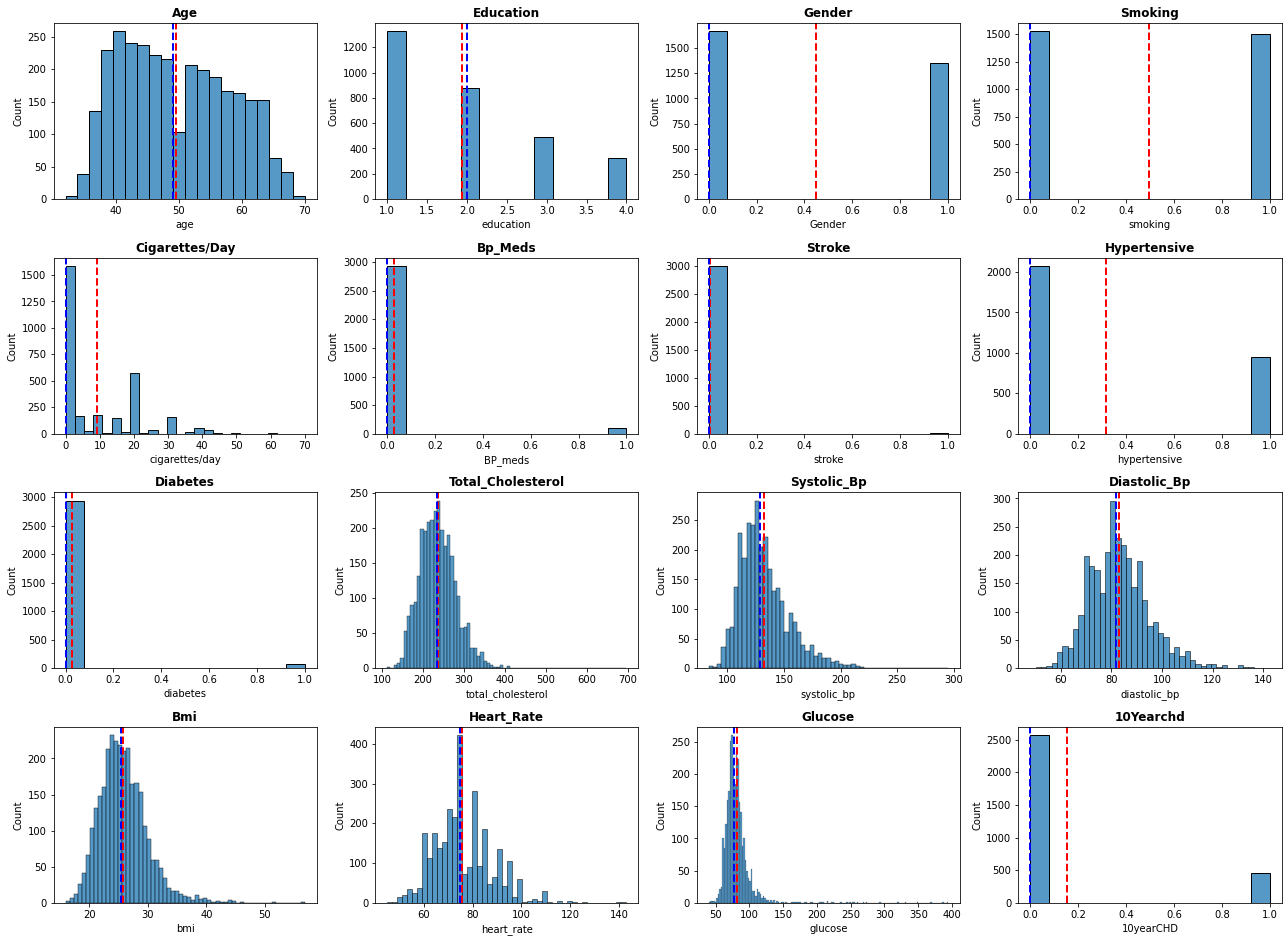

In [ ]:
# Visualizing the mean and median lines for various attributes, 
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# **Bivariate Analysis**

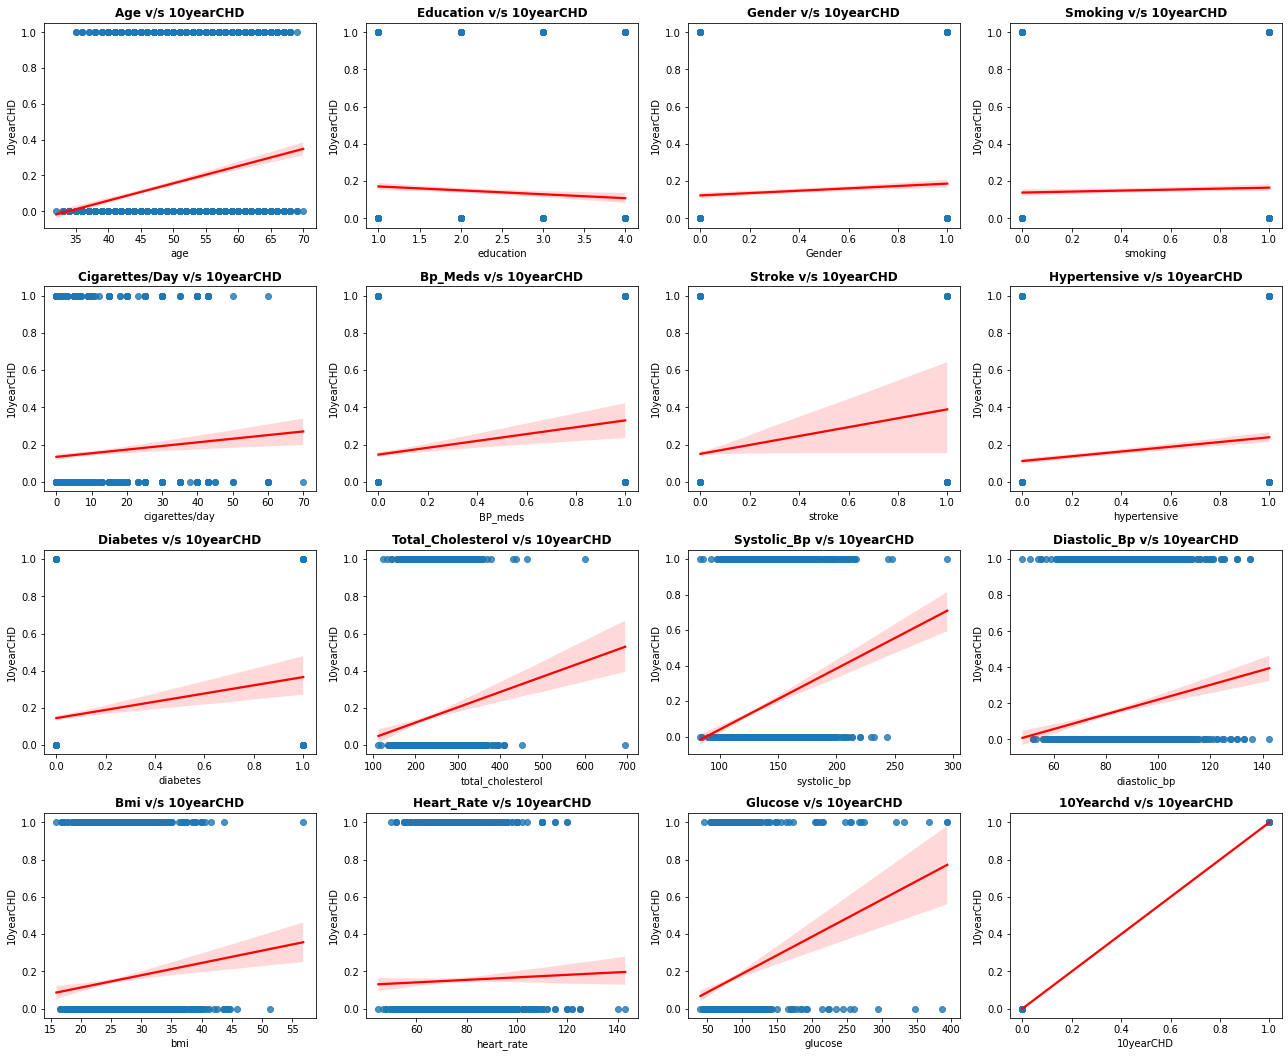

In [ ]:
# Checking Linearity using Bivariate analysis.
# list of independent variables.
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

# defining figure.
plt.figure(figsize=(18,18))

# making subplots for all independent variables vs TenYearCHD(dependent variable).
for n, column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['10yearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s 10yearCHD',weight='bold')
  plt.tight_layout()

# **Multivariate Analysis**

# **Checking for Multi-Collinearity**

*Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.*

*A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.*

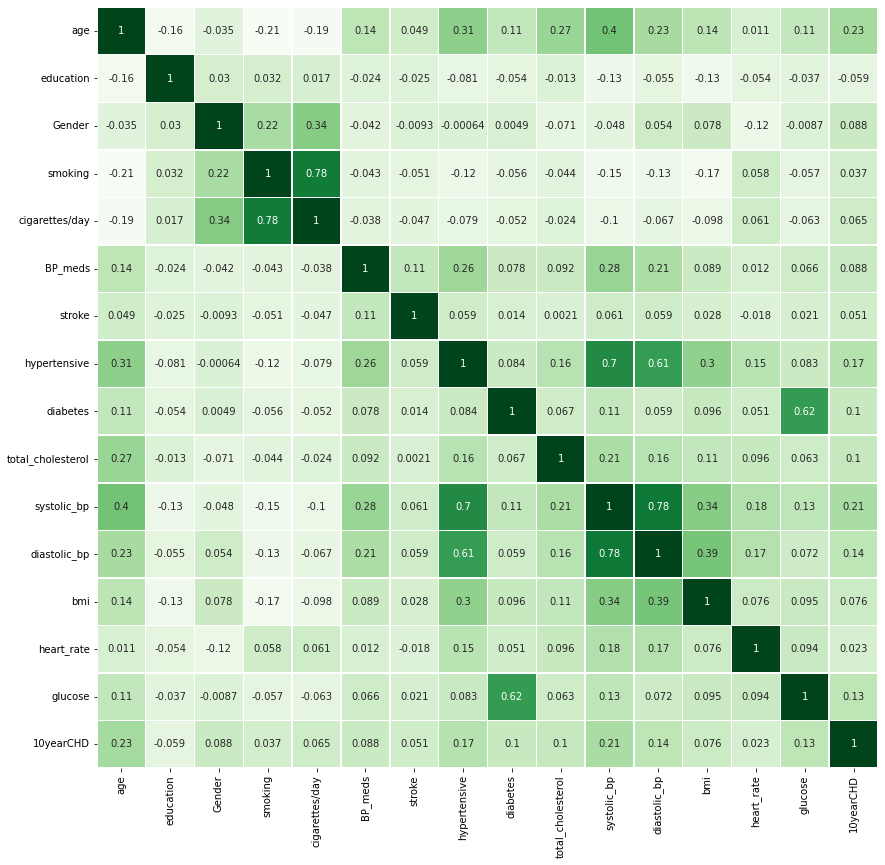

In [ ]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlmap,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=False)

In [ ]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df["mean_art_pressure"] = (df["systolic_bp"] + 2 * df["diastolic_bp"])/3

In [ ]:
# Dropping the SysBP and DiaBp attributes, since they're both included in MAP.
df.drop(columns = ["systolic_bp", "diastolic_bp"], inplace = True)

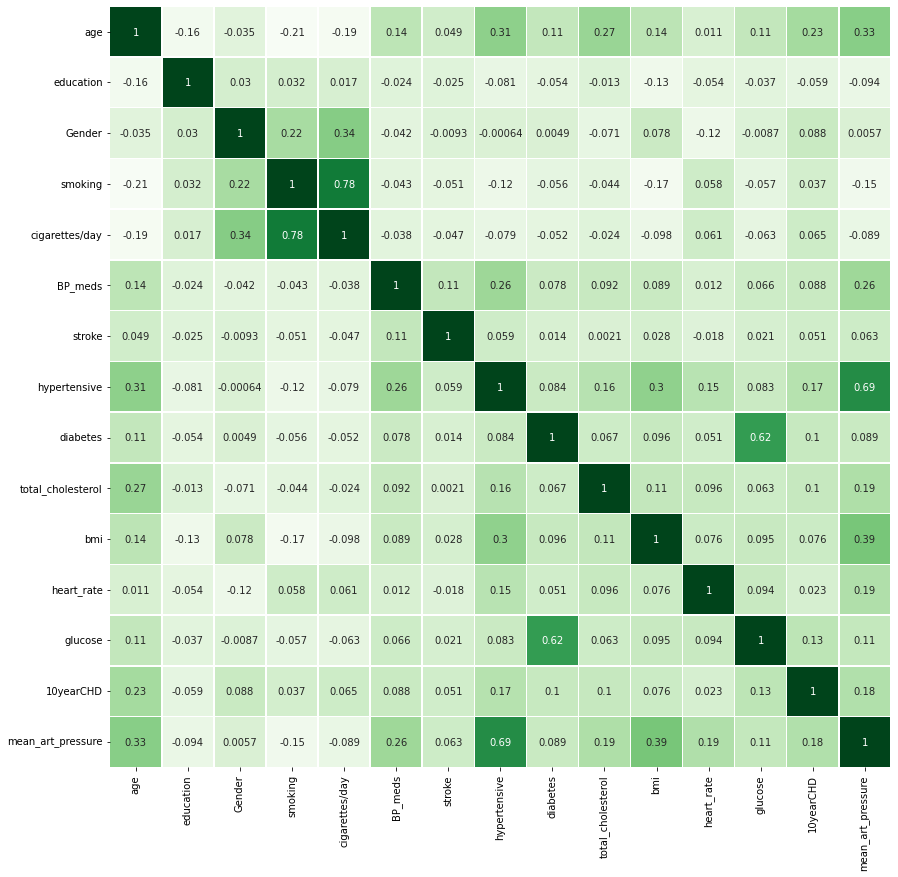

In [ ]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlmap,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=False)

In [ ]:
df

,age,education,Gender,smoking,cigarettes/day,BP_meds,stroke,hypertensive,diabetes,total_cholesterol,bmi,heart_rate,glucose,10yearCHD,mean_art_pressure
id,,,,,,,,,,,,,,,
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333333
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000000
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333333
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.166667
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,141.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,26.98,105.0,113.0,0,118.000000
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,0,93.833333
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,0,71.333333


In [ ]:
#Independent Variables
X= df[['age', 'education', 'smoking', 'cigarettes/day', 'BP_meds',
       'stroke', 'hypertensive', 'diabetes', 'total_cholesterol', 
       'mean_art_pressure', 'bmi', 'heart_rate', 'glucose', 'Gender']]

#Target Variable
y= df['10yearCHD']

**pie chart before imbalance**

# **Handling Imbalance Data**

In [ ]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()


In [ ]:
# Dataframe to contain Model performance analysis reports.
res_df=pd.DataFrame()

In [ ]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3023
Resampled dataset shape 5130


**count** **plot**

In [ ]:
#Converting arrays into dataframes
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

## **Scaling**

In [ ]:
#Applying normalization operation for numeric stability
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

## **Splitting The Data**

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.25, random_state=0)

In [ ]:
#Importing Important libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# **Logistic Regression**

In [ ]:
#Importing Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression


In [ ]:
# Creating model object for logistic regression.

clf = LogisticRegression(fit_intercept=True, max_iter=10000)

In [ ]:
# fit the model.

clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Getting the predicted classes for training and testing set

train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy = accuracy_score(train_class_preds, y_train)
test_accuracy = accuracy_score(test_class_preds, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6761112555237848
The accuracy on test data is  0.6921278254091972


In [ ]:
# Confusion Matrix for logistic regression classifier.

cf_matrix = confusion_matrix(y_test,test_class_preds)
cf_matrix

array([[437, 212],
       [183, 451]])

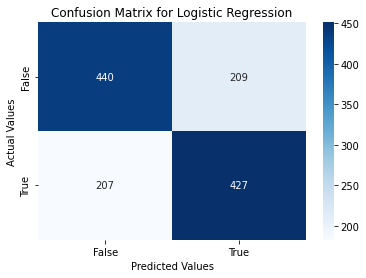

In [ ]:
labels = ['440','209','207','427']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [ ]:
# Getting classification report.

dict_1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

In [ ]:
tempodf=pd.DataFrame(dict_1).transpose()
tempodf['Model'] = 'logistic regression'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.692128,0.692128,0.692128,0.692128,logistic regression


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
parameters = {'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]}

In [ ]:
dt_clf = GridSearchCV(dt_clf, parameters, scoring='roc_auc', cv=5)

In [ ]:
dt_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [ ]:
dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=30)

In [ ]:
# Getting the predicted classes for training and testing set

train_dt_prediction = dt_clf.predict(X_train)
test_dt_prediction = dt_clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_dt = accuracy_score(train_dt_prediction, y_train)
test_accuracy_dt = accuracy_score(test_dt_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_dt)
print("The accuracy on test data is ", test_accuracy_dt)

The accuracy on train data is  0.8224590590070184
The accuracy on test data is  0.7661730319563523


In [ ]:
# Confusion Matrix for random forest classifier.

dt_cf_matrix = confusion_matrix(y_test,test_dt_prediction)
dt_cf_matrix

array([[533, 116],
       [184, 450]])

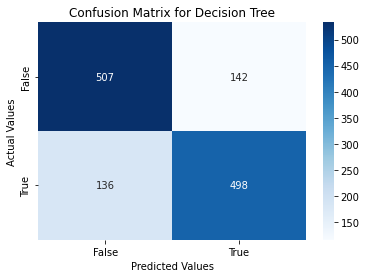

In [ ]:
# Plotting the confusion matrix

labels = ['507','142','136','498']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(dt_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_dt = dt_clf.predict(X_test)

In [ ]:
# Getting classification report.

dict_2 = classification_report(y_test, y_pred_dt, output_dict = True)

In [ ]:
tempodf=pd.DataFrame(dict_2).transpose()
tempodf['Model'] = 'decision tree'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.692128,0.692128,0.692128,0.692128,logistic regression
accuracy,0.766173,0.766173,0.766173,0.766173,decision tree


In [ ]:
#viewDecisionTree(dt_clf, X.columns)

#**Random Forest Classifier**

In [ ]:
# Importing Necessary library

from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Creating an instance for the random forest regressor.

rf_clf = RandomForestClassifier()

In [ ]:
params = {'n_estimators' : [750, 850],
         'max_depth': [7,9],
         'max_features' : [7,8],
         'min_samples_leaf' : [2,3]}

In [ ]:
cv = GridSearchCV(rf_clf, param_grid = params, scoring = 'roc_auc', cv =5)

In [ ]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 9], 'max_features': [7, 8],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [750, 850]},
             scoring='roc_auc')

In [ ]:
cv.best_estimator_

RandomForestClassifier(max_depth=9, max_features=8, min_samples_leaf=2,
                       n_estimators=850)

In [ ]:
# Getting the predicted classes for training and testing set

train_rf_prediction = cv.predict(X_train)
test_rf_prediction = cv.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_rf = accuracy_score(train_rf_prediction, y_train)
test_accuracy_rf = accuracy_score(test_rf_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9391733818559916
The accuracy on test data is  0.8581449727201871


In [ ]:
# Confusion Matrix for random forest classifier.

rf_cf_matrix = confusion_matrix(y_test,test_rf_prediction)
rf_cf_matrix

array([[559,  90],
       [ 92, 542]])

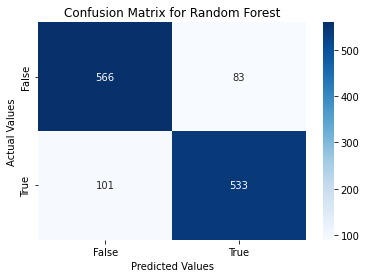

In [ ]:
# Plotting the confusion matrix

labels = ['566','83','101','533']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(rf_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_rf = cv.predict(X_test)

In [ ]:
# Getting classification report.

dict_3 = classification_report(y_test, y_pred_rf, output_dict = True)

In [ ]:
tempodf=pd.DataFrame(dict_3).transpose()
tempodf['Model'] = 'random forest'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.692128,0.692128,0.692128,0.692128,logistic regression
accuracy,0.766173,0.766173,0.766173,0.766173,decision tree
accuracy,0.858145,0.858145,0.858145,0.858145,random forest


#**K-Nearest Neighbor Classifier**

In [ ]:
# Importing necessary library

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Creating an instance for the KNN classifier.

KNN_clf = KNeighborsClassifier()

In [ ]:
# Using hyperparameter tuning to get the opimal value of n_neighbors

parameters = {'n_neighbors':np.arange(1,50,2)}
cv_knn = GridSearchCV(KNN_clf, cv = 5, param_grid = parameters)

In [ ]:
# Fitting the model

cv_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [ ]:
# Checking the best parameter.

cv_knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Getting the predicted classes for training and testing set

train_knn_prediction = cv_knn.predict(X_train)
test_knn_prediction = cv_knn.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_knn = accuracy_score(train_knn_prediction, y_train)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  1.0
The accuracy on test data is  0.8207326578332035


In [ ]:
# Confusion Matrix for KNN classifier.

knn_cf_matrix = confusion_matrix(y_test,test_knn_prediction)
knn_cf_matrix

array([[468, 181],
       [ 49, 585]])

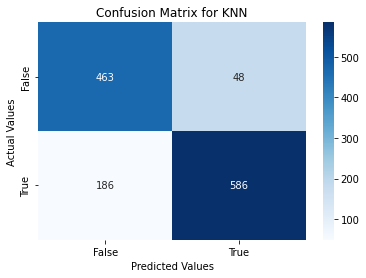

In [ ]:
labels = ['463','48','186','586']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(knn_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for KNN');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_KNN = cv_knn.predict(X_test)

In [ ]:
# Getting classification report.

dict_4 = classification_report(y_test, y_pred_KNN, output_dict = True)

In [ ]:
tempodf=pd.DataFrame(dict_4).transpose()
tempodf['Model'] = 'KNN'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.692128,0.692128,0.692128,0.692128,logistic regression
accuracy,0.766173,0.766173,0.766173,0.766173,decision tree
accuracy,0.858145,0.858145,0.858145,0.858145,random forest
accuracy,0.820733,0.820733,0.820733,0.820733,KNN


#**Gaussian Naive Bayes**

In [ ]:
# Necessary library

from sklearn.naive_bayes import GaussianNB

In [ ]:
# Creating model object for Naive Bayes Classifier

gnb = GaussianNB()

In [ ]:
# Fitting the model

gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Getting the predicted classes for training and testing set

train_class_preds_gnb = gnb.predict(X_train)
test_class_preds_gnb = gnb.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_gnb = accuracy_score(train_class_preds_gnb, y_train)
test_accuracy_gnb = accuracy_score(test_class_preds_gnb, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_gnb)
print("The accuracy on test data is ", test_accuracy_gnb)

The accuracy on train data is  0.5926696126852092
The accuracy on test data is  0.6024941543257989


In [ ]:
# Confusion Matrix for logistic regression classifier.

cf_matrix_gnb = confusion_matrix(y_test,test_class_preds_gnb)
cf_matrix_gnb

array([[562,  87],
       [423, 211]])

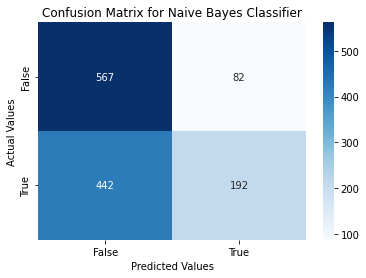

In [ ]:
labels = ['567','82','442','192']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_gnb, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_gnb = gnb.predict(X_test)

In [ ]:
# Getting classification report.

dict_5 = classification_report(y_test, y_pred_gnb, output_dict = True)

In [ ]:
tempodf=pd.DataFrame(dict_5).transpose()
tempodf['Model'] = 'naive bayes'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.692128,0.692128,0.692128,0.692128,logistic regression
accuracy,0.766173,0.766173,0.766173,0.766173,decision tree
accuracy,0.858145,0.858145,0.858145,0.858145,random forest
accuracy,0.820733,0.820733,0.820733,0.820733,KNN
accuracy,0.602494,0.602494,0.602494,0.602494,naive bayes


#**Extreme Gradient Boost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]

# storing the hyperparameters in Dict

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the XGBoost

xgb_model = XGBClassifier(learning_rate=0.1)

In [ ]:
xgb_random = GridSearchCV(xgb_model, param_grid = param_dict, scoring = 'roc_auc',cv=5)

In [ ]:
xgb_random.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [ ]:
# Checking the best parameter.

xgb_random.best_estimator_

XGBClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
# Getting the predicted classes for training and testing set

train_xgb_prediction = xgb_random.predict(X_train)
test_xgb_prediction = xgb_random.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_xgb = accuracy_score(train_xgb_prediction, y_train)
test_accuracy_xgb = accuracy_score(test_xgb_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9841434884325448
The accuracy on test data is  0.8916601714731099


In [ ]:
# Confusion Matrix for logistic regression classifier.

cf_matrix_xgb = confusion_matrix(y_test,test_xgb_prediction)
cf_matrix_xgb

array([[590,  59],
       [ 80, 554]])

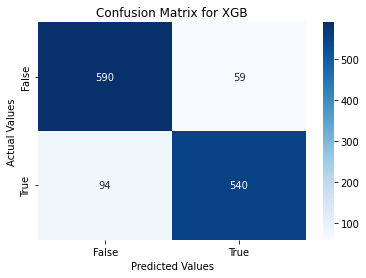

In [ ]:
labels = ['590','59','94','540']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_xgb, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for XGB');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_xgb = xgb_random.predict(X_test)

In [ ]:
# Getting classification report.

dict_6 = classification_report(y_test, y_pred_xgb, output_dict = True)

In [ ]:
tempodf=pd.DataFrame(dict_6).transpose()
tempodf['Model'] = 'XGB'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.692128,0.692128,0.692128,0.692128,logistic regression
accuracy,0.766173,0.766173,0.766173,0.766173,decision tree
accuracy,0.858145,0.858145,0.858145,0.858145,random forest
accuracy,0.820733,0.820733,0.820733,0.820733,KNN
accuracy,0.602494,0.602494,0.602494,0.602494,naive bayes
accuracy,0.891660,0.891660,0.891660,0.891660,XGB


#**Support Vector Machine**

In [ ]:
# Importing Support vector machine Classifier.

from sklearn import svm

In [ ]:
# Create a svm Classifier

svmc = svm.SVC(kernel='poly')

In [ ]:
# Fitting the model with training set

svmc.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
# Getting the predicted classes for training and testing set

train_svm_prediction = svmc.predict(X_train)
test_svm_prediction = svmc.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_svm = accuracy_score(train_svm_prediction, y_train)
test_accuracy_svm = accuracy_score(test_svm_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", test_accuracy_svm)

The accuracy on train data is  0.7512347283597609
The accuracy on test data is  0.734996102883866


In [ ]:
# Confusion Matrix for random forest classifier.

svm_cf_matrix = confusion_matrix(y_test,test_svm_prediction)
svm_cf_matrix

array([[455, 194],
       [146, 488]])

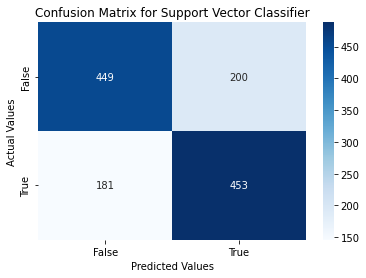

In [ ]:
# Plotting the confusion matrix

labels = ['449','200','181','453']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(svm_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Support Vector Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_svm = svmc.predict(X_test)

In [ ]:
# Getting classification report.

dict_7 = classification_report(y_test, y_pred_svm, output_dict = True)

In [ ]:
tempodf=pd.DataFrame(dict_7).transpose()
tempodf['Model'] = 'SVM'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.692128,0.692128,0.692128,0.692128,logistic regression
accuracy,0.766173,0.766173,0.766173,0.766173,decision tree
accuracy,0.858145,0.858145,0.858145,0.858145,random forest
accuracy,0.820733,0.820733,0.820733,0.820733,KNN
accuracy,0.602494,0.602494,0.602494,0.602494,naive bayes
accuracy,0.891660,0.891660,0.891660,0.891660,XGB
accuracy,0.734996,0.734996,0.734996,0.734996,SVM


# **Gradient Boosting Classsifier**

In [ ]:
#importing gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[165,170,175]
max_depth=[13,14,15]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)
gb_grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [165, 170, 175]})

In [ ]:
#printing best parameter
gb_grid.best_params_

{'max_depth': 13, 'n_estimators': 170}

In [ ]:
# Getting the predicted classes for training and testing set

train_gb_prediction = gb_grid.predict(X_train)
test_gb_prediction = gb_grid.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_gb = accuracy_score(train_gb_prediction, y_train)
test_accuracy_gb = accuracy_score(test_gb_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_gb)
print("The accuracy on test data is ", test_accuracy_gb)

The accuracy on train data is  1.0
The accuracy on test data is  0.8955572876071707


In [ ]:
# Confusion Matrix for KNN classifier.

gb_cf_matrix = confusion_matrix(y_test,test_gb_prediction)
gb_cf_matrix

array([[582,  67],
       [ 67, 567]])

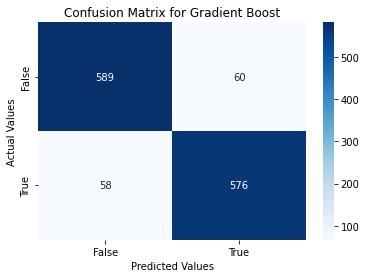

In [ ]:
labels = ['589','60','58','576']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(gb_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Gradient Boost');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_gb = gb_grid.predict(X_test)

In [ ]:
# Getting classification report.

dict_8 = classification_report(y_test, y_pred_gb, output_dict = True)

In [ ]:
tempodf=pd.DataFrame(dict_8).transpose()
tempodf['Model'] = 'Gradient Boost'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.692128,0.692128,0.692128,0.692128,logistic regression
accuracy,0.766173,0.766173,0.766173,0.766173,decision tree
accuracy,0.858145,0.858145,0.858145,0.858145,random forest
accuracy,0.820733,0.820733,0.820733,0.820733,KNN
accuracy,0.602494,0.602494,0.602494,0.602494,naive bayes
accuracy,0.891660,0.891660,0.891660,0.891660,XGB
accuracy,0.734996,0.734996,0.734996,0.734996,SVM
accuracy,0.895557,0.895557,0.895557,0.895557,Gradient Boost


In [ ]:
# Importing Tensorflow for neural networks.
from tensorflow import keras
import tensorflow as tf

In [ ]:
# Developing a Neural network with 2 hidden layers and 1 output layer
def get_model():

    # Creating sequential NN model 
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),

        # using 'tanh' function as the activation function in hidden layers
        keras.layers.Dense(512, activation='tanh'),
        keras.layers.Dense(256, activation='tanh'),

        # keras.layers.Dense(128, activation='relu'),
        # keras.layers.Dense(64, activation='relu'),
        # keras.layers.Dense(32, activation='relu'),
        # keras.layers.Dropout(0.5),

        # using 'sigmoid' function as activation function in output layer
        # this is because we only need to perform a binary classification
        keras.layers.Dense(2, activation='sigmoid')
    ])

    # Compiling the model
    model.compile(optimizer = 'Adagrad', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Define a batch size
batch_size = 512

# Creating training and testing datasets using tenserflow
train_ds = tf.data.Dataset.from_tensor_slices((x_smote, y_smote)).shuffle(len(X_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Get model object
model = get_model()

# Fitting training data to the model
fit = model.fit(train_ds, validation_data=val_ds, epochs = 60)

Epoch 1/60
11/11 [==============================] - 1s 29ms/step - loss: 0.7383 - accuracy: 0.5185 - val_loss: 0.8176 - val_accuracy: 0.4170
Epoch 2/60
11/11 [==============================] - 0s 15ms/step - loss: 0.6883 - accuracy: 0.5688 - val_loss: 0.8008 - val_accuracy: 0.4287
Epoch 3/60
11/11 [==============================] - 0s 17ms/step - loss: 0.6694 - accuracy: 0.5899 - val_loss: 0.7799 - val_accuracy: 0.4505
Epoch 4/60
11/11 [==============================] - 0s 15ms/step - loss: 0.6846 - accuracy: 0.5797 - val_loss: 0.7926 - val_accuracy: 0.4357
Epoch 5/60
11/11 [==============================] - 0s 15ms/step - loss: 0.6617 - accuracy: 0.6025 - val_loss: 0.7834 - val_accuracy: 0.4466
Epoch 6/60
11/11 [==============================] - 0s 16ms/step - loss: 0.6658 - accuracy: 0.5891 - val_loss: 0.7894 - val_accuracy: 0.4388
Epoch 7/60
11/11 [==============================] - 0s 15ms/step - loss: 0.6565 - accuracy: 0.6000 - val_loss: 0.7867 - val_accuracy: 0.4466
Epoch 8/60
11

In [ ]:
# Predicted values for Neural Network model on test set
y_pred_nn = np.round(model.predict(X_test), 0)

In [ ]:
# Converting the results into numpy array
y_pred_nn = np.array([round(ele[1]) for ele in y_pred_nn])

In [ ]:
# Converting test set values into numpy array
y_testnn = (np.array(y_test))

In [ ]:
# Lengths of both test and predict values
# Anonymously the length were differentiable on some re-runs, checking just in case! 
print(len(y_pred_nn))
print(len(y_testnn))

1283
1283


In [ ]:
# Getting Classification report for neural network model
dict_9 = classification_report(y_testnn, y_pred_nn, output_dict=True)

In [ ]:
tempodf=pd.DataFrame(dict_9).transpose()
tempodf['Model'] = 'Neural Networks'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.692128,0.692128,0.692128,0.692128,logistic regression
accuracy,0.766173,0.766173,0.766173,0.766173,decision tree
accuracy,0.858145,0.858145,0.858145,0.858145,random forest
accuracy,0.820733,0.820733,0.820733,0.820733,KNN
accuracy,0.602494,0.602494,0.602494,0.602494,naive bayes
accuracy,0.891660,0.891660,0.891660,0.891660,XGB
accuracy,0.734996,0.734996,0.734996,0.734996,SVM
accuracy,0.895557,0.895557,0.895557,0.895557,Gradient Boost
accuracy,0.445051,0.445051,0.445051,0.445051,Neural Networks
